In [19]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
train = pd.read_csv('train_house_price.csv')
test = pd.read_csv('house_price_test.csv')

# Inspecting the data frame shape, size, type etc.

In [21]:
train.shape

(1460, 81)

In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
test.shape

(1459, 80)

In [24]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA on the data

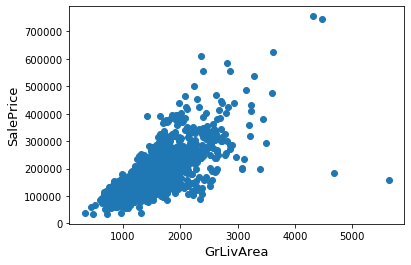

In [26]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


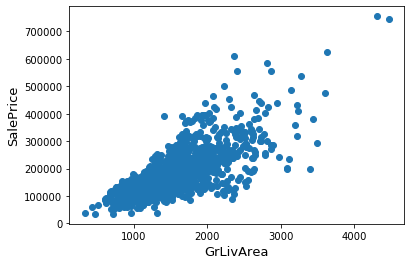

In [27]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

C:\Users\mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\moha


 mu = 180932.92 and sigma = 79467.79



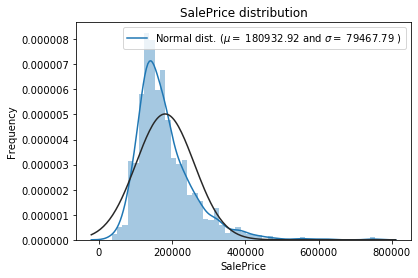

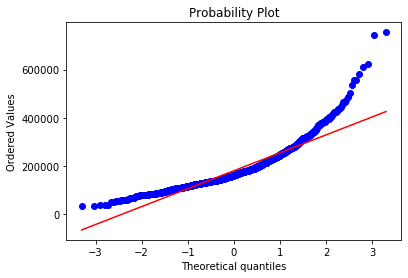

In [28]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

C:\Users\mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\moha


 mu = 12.02 and sigma = 0.40



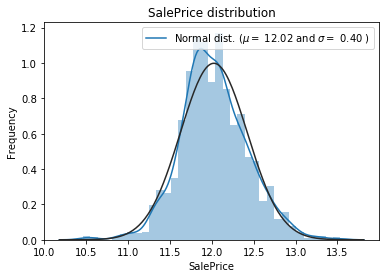

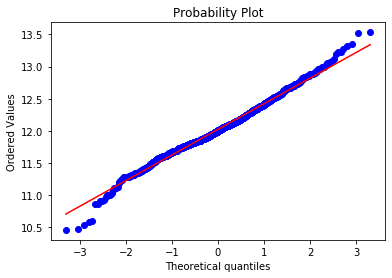

In [29]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [30]:
id = test['Id']

In [31]:
df_new = pd.concat((train, test)).reset_index(drop=True)
y_train = train['SalePrice']
df_new.drop('SalePrice', axis=1, inplace=True)

# Finding and handling missing values

In [32]:
df_new.shape

(2917, 80)

In [33]:
(df_new.isnull().sum()>0).sum() 

34

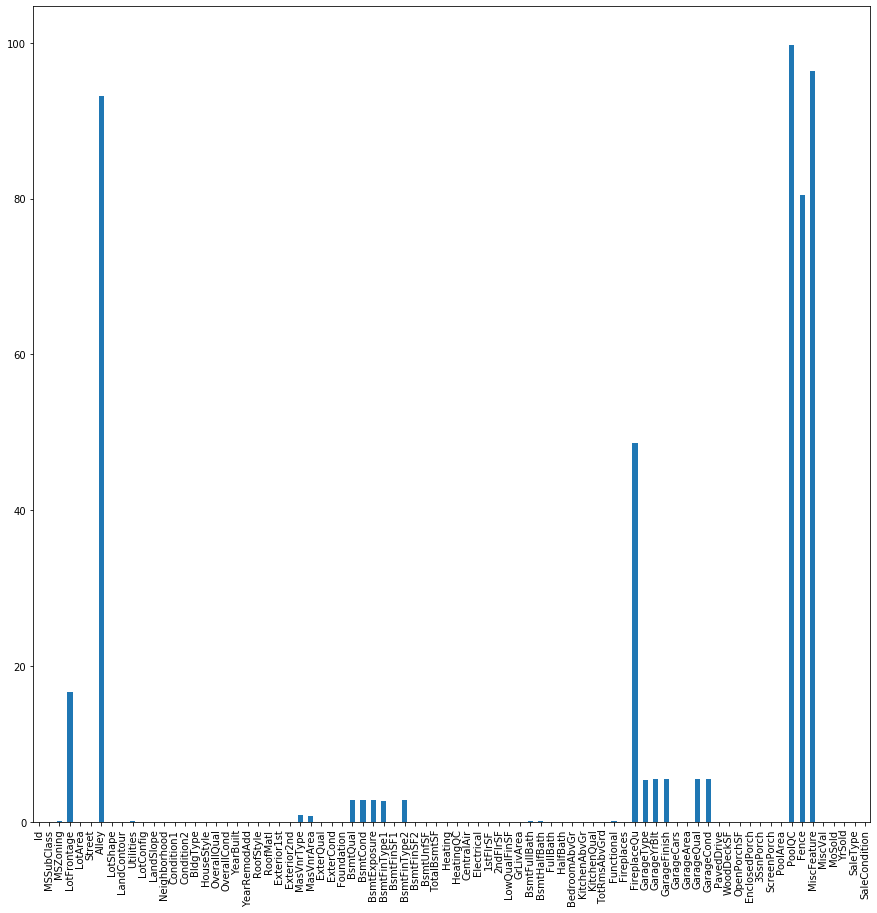

In [34]:
(df_new.isnull().sum()/df_new.shape[0]*100).plot(kind= 'bar', figsize=(15,15))

### Handling Missing values having high percentage

In [35]:
df_new.columns[df_new.isnull().sum()/df_new.shape[0]*100>40]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [36]:
#PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and 
#majority of houses have no Pool at all in general.
df_new['PoolQC'].fillna('No Pool', inplace=True)

In [37]:
#data description says NA means "no misc feature"
df_new["MiscFeature"] = df_new["MiscFeature"].fillna("None")

In [38]:
#Alley : data description says NA means "no alley access"
df_new['Alley'] = df_new['Alley'].fillna('None')

In [39]:
#Fence : data description says NA means "no fence"
df_new["Fence"] = df_new["Fence"].fillna("None")

In [40]:
#FireplaceQu : data description says NA means "no fireplace"
df_new["FireplaceQu"] = df_new["FireplaceQu"].fillna("None")

In [41]:
df_new.shape

(2917, 80)

In [42]:
df_new.columns[df_new.isnull().sum()/df_new.shape[0]*100>0]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [43]:
df_new[df_new.columns[df_new.isnull().sum()/df_new.shape[0]*100>0]]

,MSZoning,LotFrontage,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,...,KitchenQual,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SaleType
0,RL,65.0,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,No,...,Gd,Typ,Attchd,2003.0,RFn,2.0,548.0,TA,TA,WD
1,RL,80.0,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,Gd,...,TA,Typ,Attchd,1976.0,RFn,2.0,460.0,TA,TA,WD
2,RL,68.0,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Mn,...,Gd,Typ,Attchd,2001.0,RFn,2.0,608.0,TA,TA,WD
3,RL,60.0,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,No,...,Gd,Typ,Detchd,1998.0,Unf,3.0,642.0,TA,TA,WD
4,RL,84.0,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Av,...,Gd,Typ,Attchd,2000.0,RFn,3.0,836.0,TA,TA,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,RM,21.0,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,No,...,TA,Typ,NaN,NaN,NaN,0.0,0.0,NaN,NaN,WD
2913,RM,21.0,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,No,...,TA,Typ,CarPort,1970.0,Unf,1.0,286.0,TA,TA,WD
2914,RL,160.0,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,No,...,TA,Typ,Detchd,1960.0,Unf,2.0,576.0,TA,TA,WD
2915,RL,62.0,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,Av,...,TA,Typ,NaN,NaN,NaN,0.0,0.0,NaN,NaN,WD


### Handling Missing numerical feature

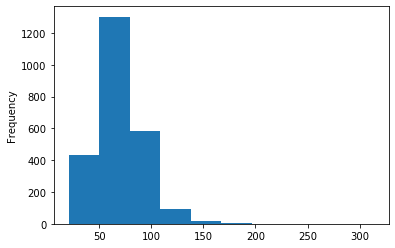

In [44]:
df_new['LotFrontage'].plot(kind='hist')

In [45]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses 
#in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
df_new["LotFrontage"] = df_new.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [46]:
df_new['LotFrontage'].isnull().sum()

0

In [47]:
df_new.shape

(2917, 80)

In [48]:
df_new.columns[df_new.isnull().sum()/df_new.shape[0]*100>0]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [49]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_new[col] = df_new[col].fillna('None')

In [50]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_new[col] = df_new[col].fillna(0)

In [51]:
df_new.shape

(2917, 80)

In [52]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and 
#BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_new[col] = df_new[col].fillna(0)

In [53]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
#For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_new[col] = df_new[col].fillna('None')

In [54]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. 
#We can fill 0 for the area and None for the type.
df_new["MasVnrType"] = df_new["MasVnrType"].fillna("None")
df_new["MasVnrArea"] = df_new["MasVnrArea"].fillna(0)


In [55]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value.
#So we can fill in missing values with 'RL'
df_new['MSZoning'] = df_new['MSZoning'].fillna(df_new['MSZoning'].mode()[0])

In [56]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA .
#Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df_new = df_new.drop(['Utilities'], axis=1)

In [57]:
#Functional : data description says NA means typical
df_new["Functional"] = df_new["Functional"].fillna("Typ")

In [58]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_new['Electrical'] = df_new['Electrical'].fillna(df_new['Electrical'].mode()[0])

In [59]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) 
#for the missing value in KitchenQual.
df_new['KitchenQual'] = df_new['KitchenQual'].fillna(df_new['KitchenQual'].mode()[0])

In [60]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
df_new['Exterior1st'] = df_new['Exterior1st'].fillna(df_new['Exterior1st'].mode()[0])
df_new['Exterior2nd'] = df_new['Exterior2nd'].fillna(df_new['Exterior2nd'].mode()[0])


#SaleType : Fill in again with most frequent which is "WD"
df_new['SaleType'] = df_new['SaleType'].fillna(df_new['SaleType'].mode()[0])


#MSSubClass : Na most likely means No building class. We can replace missing values with None
df_new['MSSubClass'] = df_new['MSSubClass'].fillna("None")

In [61]:
df_new.columns[df_new.isnull().sum()/df_new.shape[0]*100>0]

Index([], dtype='object')

### So, finally we are done with all the missing values.

## Exploring numerical Features

In [62]:
df_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,0,No Pool,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,0,No Pool,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,0,No Pool,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,0,No Pool,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,0,No Pool,None,None,0,12,2008,WD,Normal


In [63]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2917 non-null   int64  
 1   MSSubClass     2917 non-null   int64  
 2   MSZoning       2917 non-null   object 
 3   LotFrontage    2917 non-null   float64
 4   LotArea        2917 non-null   int64  
 5   Street         2917 non-null   object 
 6   Alley          2917 non-null   object 
 7   LotShape       2917 non-null   object 
 8   LandContour    2917 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [64]:
df_new.drop('Id', axis=1, inplace=True)  #dropping id column since its not carrying any useful info

In [65]:
df_categorical = df_new.select_dtypes(include=['object']).head()
df_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,TA,TA,Y,No Pool,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,None,None,WD,Normal


In [66]:
#Transforming some numerical variables that are really categorical

#MSSubClass=The building class
df_new['MSSubClass'] = df_new['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_new['OverallCond'] = df_new['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_new['YrSold'] = df_new['YrSold'].astype(str)
df_new['MoSold'] = df_new['MoSold'].astype(str)

### Label Encoding some categorical variables that may contain information in their ordering set

In [67]:
from sklearn.preprocessing import LabelEncoder
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    #lbl.fit(list(all_data[c].values)) 
    df_new[c] = lbl.fit_transform(list(df_new[c].values))

# shape        
print('Shape data: {}'.format(df_new.shape))

Shape data: (2917, 78)


In [68]:
df_new[cols]

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,5,2,4,0,3,2,...,0,3,2,1,1,1,10,4,2,4
1,5,2,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,5,7,1,7
2,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,10,4,2,11
3,2,4,1,5,5,3,4,2,3,2,...,0,0,2,1,1,1,11,4,0,4
4,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,10,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,3,4,4,3,3,3,4,2,3,3,...,0,3,2,1,1,1,2,6,0,8
2913,3,4,4,5,5,3,4,4,3,3,...,0,3,2,1,1,1,2,4,0,6
2914,5,4,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,5,6,0,11
2915,3,2,4,3,3,3,4,4,3,3,...,0,3,2,1,1,1,14,4,0,9


## Checking skewness of numerical features

In [69]:
numeric_feats = df_new.dtypes[df_new.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_new[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
#skewed_feats.sort_values
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [70]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_new[feat] = boxcox1p(df_new[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features]

There are 58 skewed numerical features to Box Cox transform


### Getting dummy variables for nominal categorical features

In [71]:
df_new = pd.get_dummies(df_new)
print(df_new.shape)

(2917, 219)


In [72]:
pd.set_option('display.max_columns', None)
df_new.head(15)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.000000,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,14.187527,1.194318,1.194318,10.506271,2.055642,2.055642,1.194318,0.000000,5.714669,0.000000,0.000000,0.000000,0.0,1.540963,1.820334,0.000000,1.820334,1.194318,0,0,0,1,0,0,0,0,1,0,0,0,0

## Splitting the test and train sets as was given initially

In [73]:
X_train = df_new[:train.shape[0]]

In [74]:
X_train.shape

(1458, 219)

In [76]:
X_test = df_new[train.shape[0]:]
X_test.shape

(1459, 219)

## Training DNN on the dataset

In [77]:
from sklearn.preprocessing import MinMaxScaler

## Preparing for training linear regression model

In [1155]:
from sklearn.linear_model import LinearRegression, Lasso,ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [1156]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.to_numpy())
    rmse= np.sqrt(-cross_val_score(model, X_train.to_numpy(), y_train.to_numpy(), scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [1157]:
lnr_reg = make_pipeline(RobustScaler(), LinearRegression())

In [1158]:
lnr_reg_scores = rmsle_cv(lnr_reg)

In [1159]:
lnr_reg_scores.mean()

3033692.6606665454

In [1160]:
lnr_reg_scores.std()

6067385.071253953

In [1161]:
lasso_mean = []
alphas = [0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
for alpha in alphas:
    lasso = make_pipeline(RobustScaler(), Lasso(alpha = alpha, random_state=1))
    lasso_mean.append(rmsle_cv(lasso).mean())
    

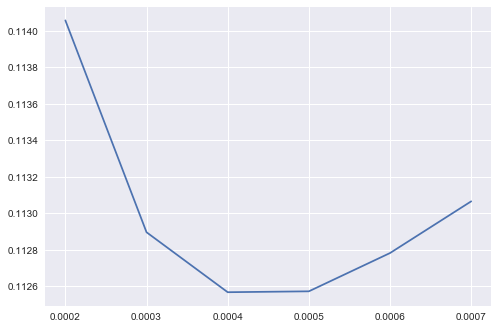

In [1162]:
plt.plot(alphas, lasso_mean)

In [1170]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [1171]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1126 (0.0076)



In [1182]:
ENet.fit(X_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))])

In [1198]:
ENet_predictions = (ENet.predict(X_test))

In [1190]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

rmsle(y_train, ENet_predictions)

0.10203043015011715

In [1191]:
np.expm1(0.1020304)

0.10741713669717882

In [1199]:
ENet_predictions = np.expm1(ENet_predictions)

In [1206]:
sub = pd.DataFrame()
sub['Id'] = id
sub['SalePrice'] = ENet_predictions
sub.to_csv('submission_ENet_house_price.csv',index=False)

In [1207]:
sub.head()

,Id,SalePrice
0,1461,119176.321233
1,1462,151123.674980
2,1463,183299.653583
3,1464,197048.013473
4,1465,196804.099555


In [1205]:
sub.shape

(1459, 2)

In [1193]:
ENet_predictions

array([208079.68436437, 180155.3717514 , 220876.27456859, ...,
       248874.33817718, 136023.86580478, 147212.94291407])

In [1064]:
from sklearn.model_selection import learning_curve

In [1065]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),
X = X_train,
y = y_train, train_sizes = np.linspace(0.2,1,40), cv = 5,
scoring = 'neg_mean_squared_error')

In [1066]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 233     0.001822
257     0.002204
281     0.002707
304     0.002959
328     0.003427
352     0.003812
376     0.004139
400     0.004369
424     0.004591
448     0.005056
472     0.005532
496     0.005776
520     0.005963
544     0.006061
568     0.006355
591     0.006666
615     0.006644
639     0.006930
663     0.007010
687     0.007372
711     0.007555
735     0.007692
759     0.007792
783     0.007951
807     0.007967
831     0.007935
855     0.007979
878     0.008096
902     0.008206
926     0.008207
950     0.008165
974     0.008304
998     0.008197
1022    0.008142
1046    0.008478
1070    0.008485
1094    0.008556
1118    0.008495
1142    0.008621
1166    0.008719
dtype: float64

 --------------------

Mean validation scores

 233     5.702811e-02
257     5.810395e-02
281     9.314359e+21
304     9.437038e+21
328     2.069466e+21
352     3.703737e-02
376     3.198567e-02
400     2.998115e-02
424     2.882884e-02
448     2.730933e-02
472     2.636623e-02
49

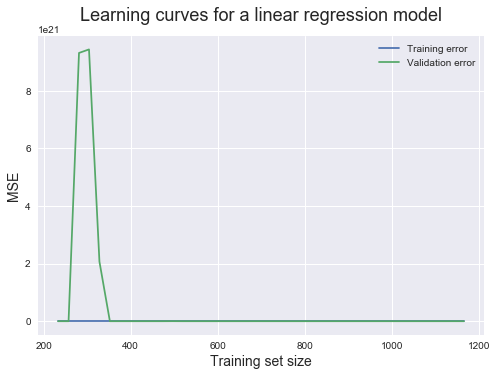

In [1067]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,10)

In [1068]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 50)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

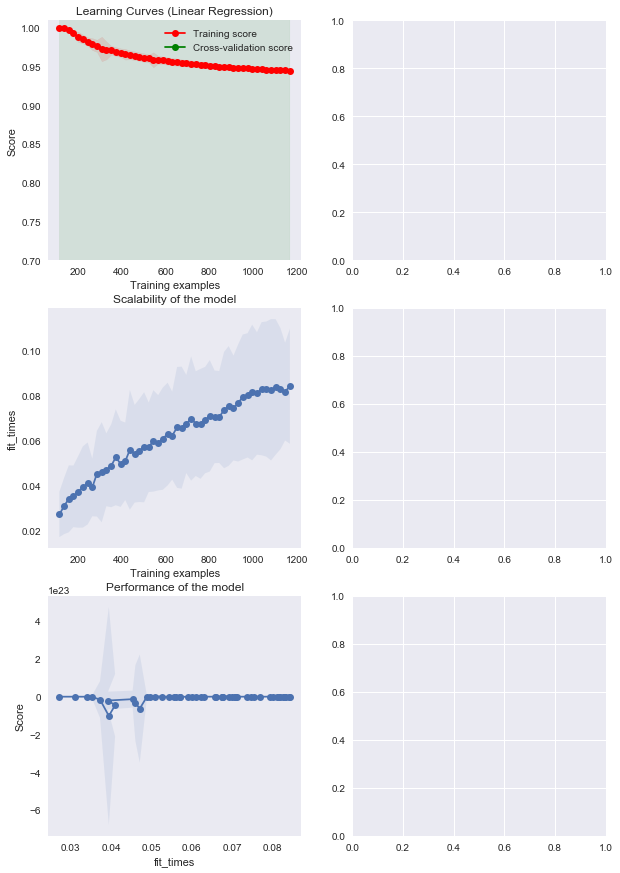

In [1069]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [1070]:
garage_column_list = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond']

df_new[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond']]

KeyError: "['GarageType'] not in index"

In [ ]:
for feature in garage_column_list:
    print(df_new[feature].value_counts())

In [ ]:
def imputemode(df,feature,value):
    df[feature+'_mode'] = df[feature].fillna(value)

In [ ]:
for feature in garage_column_list:

    value = df_new[feature].mode()[0]
    print(value)
    imputemode(df_new, feature, value)

In [ ]:
df_new.head()

In [ ]:
df_new.drop(garage_column_list, inplace=True, axis=1)

In [ ]:
df_new.shape

#### Handling missing values in Basement features

In [ ]:
df_new.columns[df_new.isnull().sum()/train.shape[0]*100>0]

In [ ]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2']

In [ ]:
df_new[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2']]

In [ ]:
df_new['BsmtQual'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
for feature in basement_features:
    value = df_new[feature].mode()[0]
    imputemode(df_new, feature, value)

In [ ]:
df_new.shape

In [ ]:
df_new.drop(basement_features, axis=1, inplace=True)

In [ ]:
df_new.shape

In [ ]:
df_new.columns[df_new.isnull().sum()/df_new.shape[0]*100>0]

### Handling remaining columns having missing values

In [ ]:
remaining_columns = df_new.columns[df_new.isnull().sum()/df_new.shape[0]*100>0]
print(remaining_columns)
#df_new[remaining_columns].isnull().sum()

In [ ]:
df_new['MasVnrType'].value_counts().sort_values().plot(kind='bar')

In [ ]:
df_new.shape

In [ ]:
df_new.info()

In [ ]:
df_new.head(20)

In [ ]:
df_new.columns[df_new.isnull().sum()/df_new.shape[0]*100>0]

In [ ]:
df_new_categorical = df_new.select_dtypes(exclude=['float', 'int64'])

In [ ]:
df_new_categorical.columns

In [ ]:
df_new_categorical = 